Load data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

level_1 = pd.read_csv('../MT data/level_1.csv')
year = pd.read_csv("../MT data/year.csv")
#exclude papers on CCS that are also not deal with any other relevant technology
year_without_CCS = year.loc[~((year['CCS'] == 1) & (year['Biochar'] == 0) & (year['BECCS'] == 0) & (year['Blue Carbon'] == 0) 
                              & (year["Ocean alkalinity enhancement"] == 0) & (year['Forest Management'] == 0)
                              & (year['Soil Carbon Sequestration'] == 0)
                              & (year['Agroforestry'] == 0) & (year['Enhanced Weathering (land based)'] == 0)
                              & (year['Ocean fertilization & Artificial upwelling'] == 0)
                              & (year["DAC(CS)"] == 0) & (year['General Literature on CDR/NET'] == 0)
                              & (year["AR"] == 0)  & (year["restoration of landscapes/peats"] == 0)),:]

#merge data and drop the papers with no data given or before 1990
year = pd.merge(level_1, year_without_CCS[['id']], on='id', how='inner')
year['year'] = pd.to_numeric(year['year'], errors='coerce')
year = year[year['year'] >= 1990].dropna(subset=['year'])

General development over time

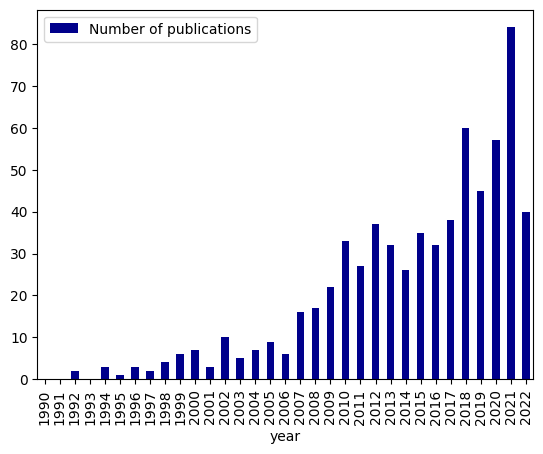

In [2]:
year['year'] = year['year'].astype('int64')
year_range = pd.DataFrame({'year': range(1990, 2023)})

# Group data by year
general = year.groupby('year').size().reset_index(name='Number of publications')
general = pd.merge(year_range, general, on='year', how='left')

# Replace NAs
general['Number of publications'] = general['Number of publications'].fillna(0)
general.plot(kind='bar',  y='Number of publications', x='year', color='darkblue')
plt.show()

Number of papers technology / policy

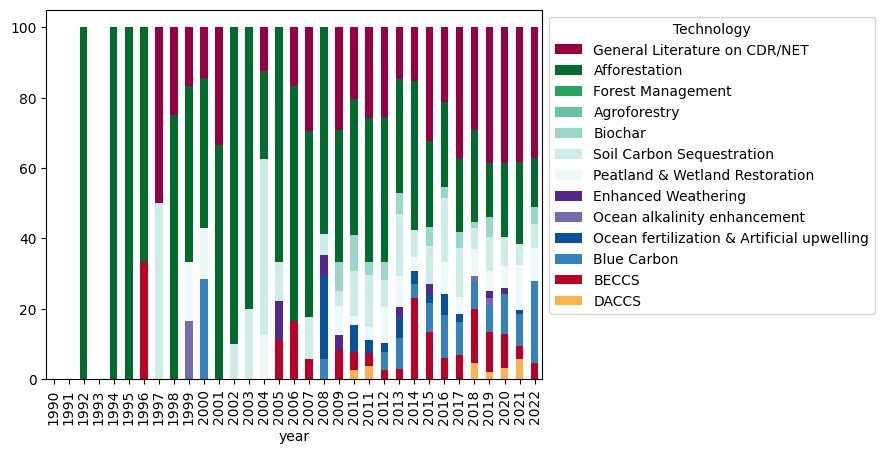

In [3]:
#Group data by yeat
technology = year.groupby('year').sum()
year_range = pd.DataFrame({'year': range(1990, 2023)}, index = None)
technology = pd.merge(year_range, technology, on='year', how='left')
technology = technology.set_index('year')

#Select relevant technologies
technology = technology.rename(columns={'AR': 'Afforestation', 
                                        'restoration of landscapes/peats': 'Peatland & Wetland Restoration', 
                                        "Enhanced Weathering (land based)": "Enhanced Weathering",
                                        "DAC(CS)": "DACCS"})
all_technologies = ["General Literature on CDR/NET", 
                    "Afforestation", 
                    "Forest Management",
                    "Agroforestry",
                    "Biochar",
                    "Soil Carbon Sequestration",
                    "Peatland & Wetland Restoration",
                    "Enhanced Weathering",
                    "Ocean alkalinity enhancement",
                    "Ocean fertilization & Artificial upwelling",
                    "Blue Carbon",
                    "BECCS",
                    "DACCS"]
#Display plot
colors_tech = ['#980043', '#006d2c', '#2ca25f', '#66c2a4', '#99d8c9', '#ccece6', '#edf8fb', '#54278f', '#756bb1', '#08519c', '#3182bd', '#bd0026', '#feb24c']
technology = technology[all_technologies[::-1]]
percentages_tech = technology.div(technology.sum(axis=1), axis=0).multiply(100)
percentages_tech.plot.bar(stacked=True, color = colors_tech[::-1])

handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[::-1]
labels = labels[::-1]

plt.legend(title="Technology", loc="upper left", bbox_to_anchor=(1,1), handles=handles, labels=labels)
plt.show()


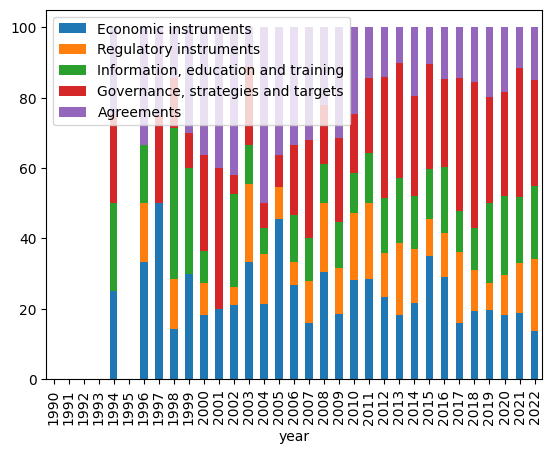

In [4]:
#Group data by year
policy = year.groupby('year').sum()
year_range = pd.DataFrame({'year': range(1990, 2023)}, index = None)
policy = pd.merge(year_range, policy, on='year', how='left')
policy = policy.set_index('year')

#Select relevant policies
all_policies = ["Economic instruments", 
                "Regulatory instruments",
                "Information, education and training",
                "Governance, strategies and targets",
                "Agreements"]

all_policies = ["Economic instruments", 
                "Regulatory instruments",
                "Information, education and training",
                "Governance, strategies and targets",
                "Agreements"]

#Show plot
colors_pol = ['#66c2a5','#fc8d62', '#8da0cb', '#e78ac3', '#a6d854']
policy = policy[all_policies]
percentages_pol = policy.div(policy.sum(axis=1), axis=0).multiply(100)
percentages_pol.plot.bar(stacked=True)
plt.show()



Combine the plots 

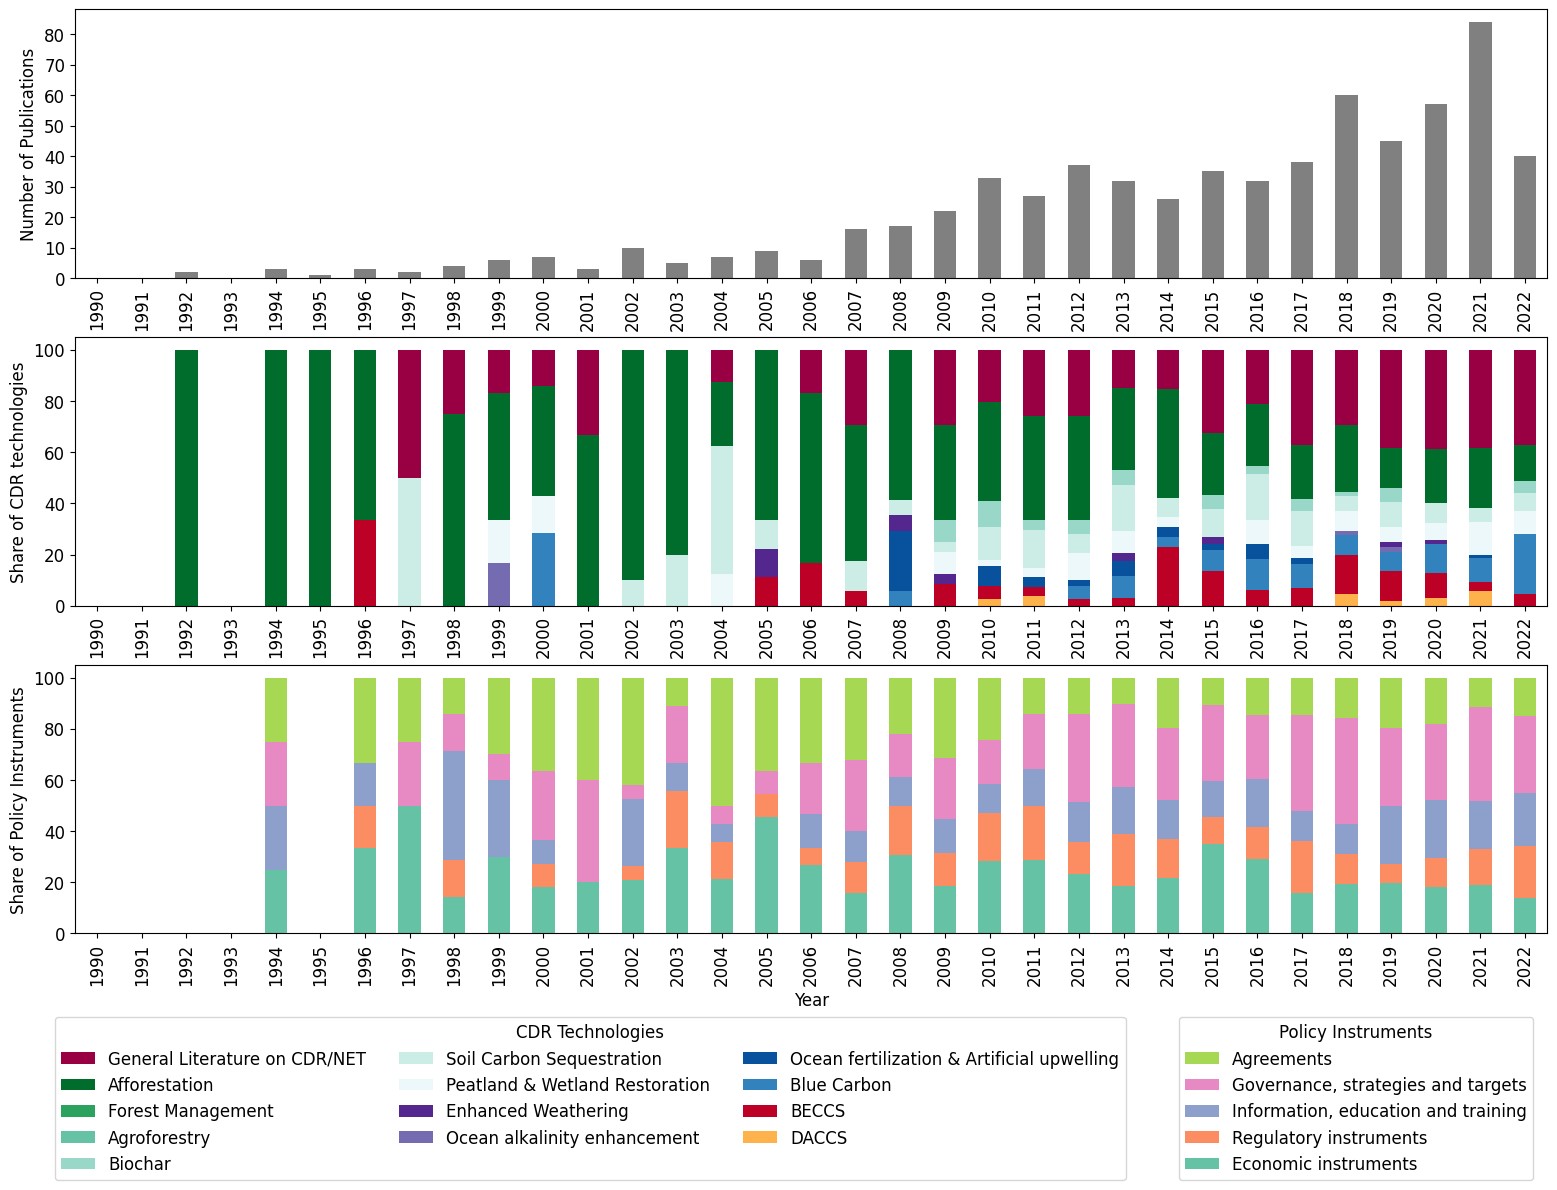

In [6]:
fig, ax = plt.subplots(3, 1, figsize=(19,12))

general.plot(kind='bar', x='year', color='grey', ax=ax[0], fontsize = 12, legend = False)
ax[0].set_ylabel("Number of Publications", fontsize = 12)

percentages_tech.plot(kind='bar', stacked = True, color= colors_tech[::-1], ax=ax[1], fontsize = 12)
ax[1].set_ylabel("Share of CDR technologies", fontsize = 12)

handles, labels = ax[1].get_legend_handles_labels()
handles = handles[::-1]
labels = labels[::-1]
ax[1].legend(handles, labels, title="CDR Technologies", loc="upper center", ncol = 3, bbox_to_anchor=(0.35, -1.5), fontsize = 12, title_fontsize=12)

percentages_pol = percentages_pol.iloc[:, ::-1]
percentages_pol.plot(kind='bar', stacked = True, color = colors_pol, ax=ax[2], fontsize = 12)
ax[2].set_ylabel("Share of Policy Instruments", fontsize = 12)
ax[2].set_xlabel("Year", fontsize = 12)
handles, labels = ax[2].get_legend_handles_labels()
ax[2].legend(reversed(handles), reversed(labels), title = "Policy Instruments", bbox_to_anchor=(0.87, -0.28), loc='upper center', ncol=1, fontsize = 12, title_fontsize=12)

fig.subplots_adjust(hspace = 0.22)
plt.show()

fig.savefig('../MT data/Papers per year.png', dpi=300, bbox_inches='tight')
